In [1]:
import pandas as pd
import datetime
from datetime import date, time, timedelta
import matplotlib.pyplot as plt

In [6]:
# Read in data containing spot prices and energy supply and demand 
# from various states

df = pd.read_excel("../../data/market_data.xlsx") 

In [7]:
# Filter and initialise each state's spot prices

vic_spotprice = df.filter(items=['Time (UTC+10)', 'Regions VIC Trading Price ($/MWh)'])
nsw_spotprice = df.filter(items=['Time (UTC+10)', 'Regions NSW Trading Price ($/MWh)'])
sa_spotprice = df.filter(items=['Time (UTC+10)', 'Regions SA Trading Price ($/MWh)'])
tas_spotprice = df.filter(items=['Time (UTC+10)', 'Regions TAS Trading Price ($/MWh)'])

### Correlation matrix of spot prices

In [8]:
# Create correlation matrix of spot prices and states

corr_matrix = pd.concat([vic_spotprice, nsw_spotprice, sa_spotprice, tas_spotprice],
                        axis=1).corr(method = 'pearson')
corr_matrix

,Regions VIC Trading Price ($/MWh),Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh)
Regions VIC Trading Price ($/MWh),1.000000,0.308409,0.731366,0.033279
Regions NSW Trading Price ($/MWh),0.308409,1.000000,0.077953,0.027427
Regions SA Trading Price ($/MWh),0.731366,0.077953,1.000000,0.043101
Regions TAS Trading Price ($/MWh),0.033279,0.027427,0.043101,1.000000


### Data analysis

In [9]:
# Rename columns for easier accessibility
vic_spotprice = vic_spotprice.rename(columns={'Regions VIC Trading Price ($/MWh)': 'Spot Price', 'Time (UTC+10)': 'Time'})

vic_spotprice['Time'] = pd.to_datetime(vic_spotprice['Time'])   # Convert data type to datetime format

copy = vic_spotprice.copy()

In [10]:
copy['date'] = [d.date() for d in copy['Time']]   # Put all dates into a list 

# Set first and last dates to specify range
first_date = copy.iloc[0]['date']
last_date = copy.iloc[-1]['date']

2018-01-18 904.5291666666666


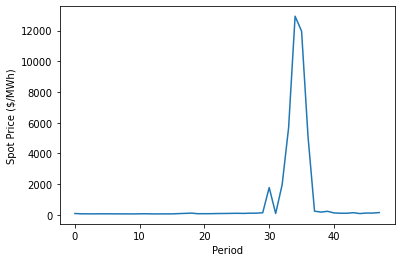

2018-01-19 523.3735416666667


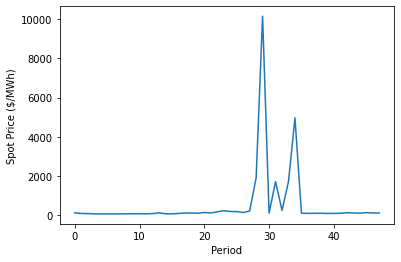

2018-01-28 246.024375


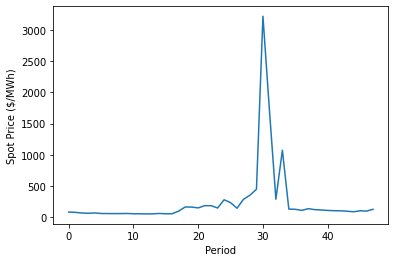

2018-02-07 489.37750000000005


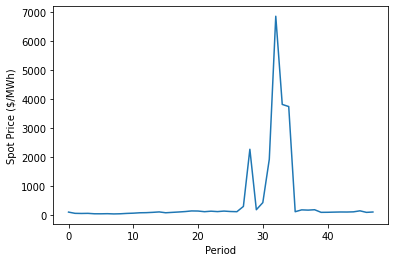

2019-01-15 208.89375000000004


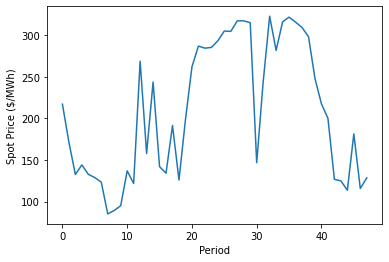

2019-01-22 255.32354166666664


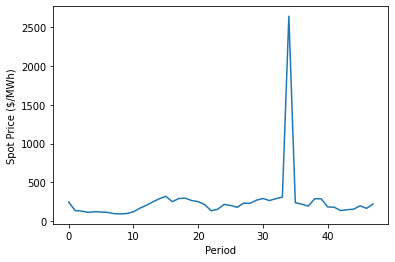

2019-01-24 3377.320416666666


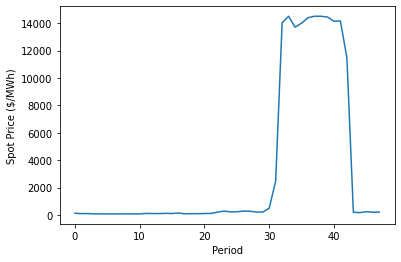

2019-01-25 751.0435416666666


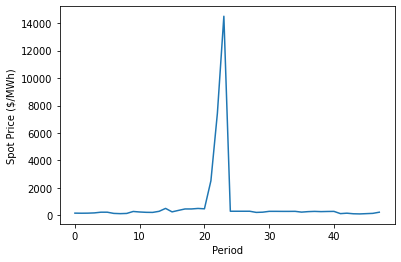

2019-02-02 223.37395833333335


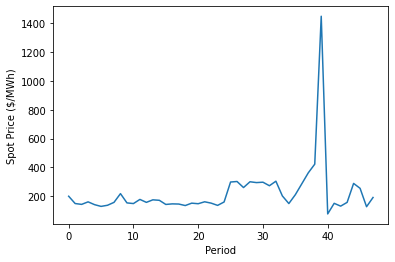

2019-03-01 988.9389583333332


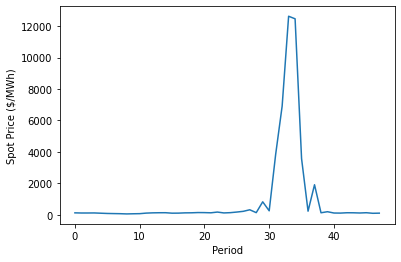

2019-08-13 248.713125


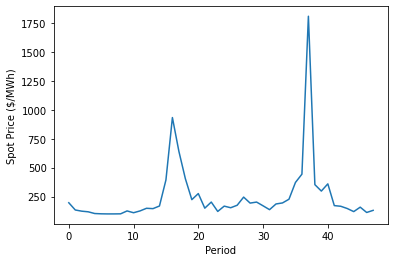

2019-12-30 235.75833333333333


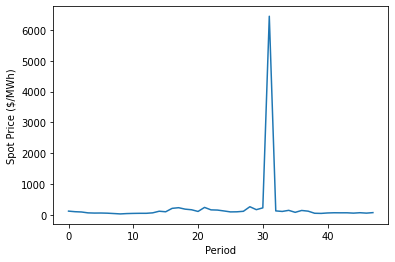

2020-01-30 755.33625


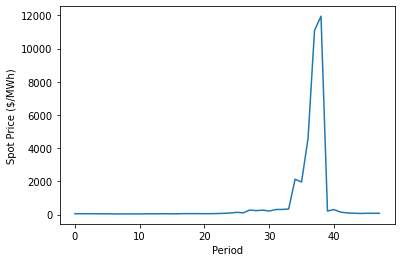

2020-01-31 2189.4360416666664


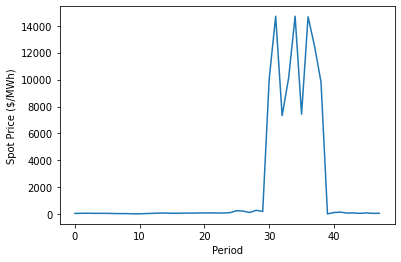

2021-05-17 244.11041666666668


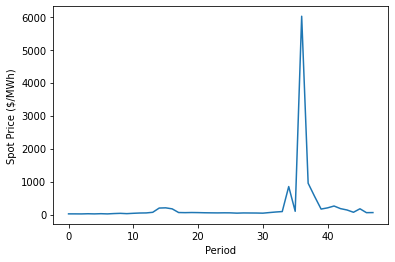

2021-05-18 440.8625


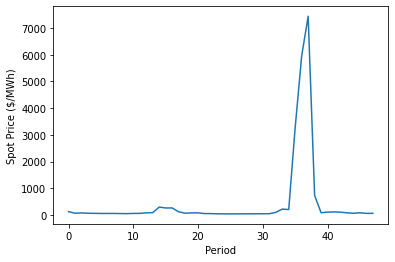

2021-06-21 247.80479166666666


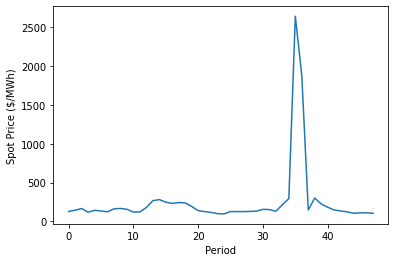

2021-07-06 265.99833333333333


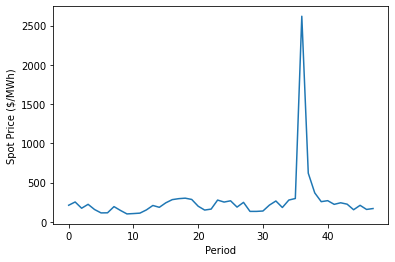

2021-07-08 247.15895833333335


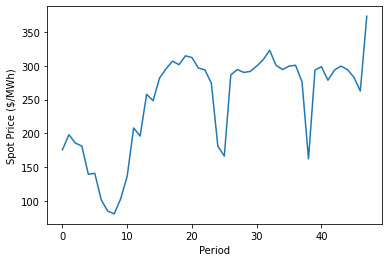

2021-07-09 260.8454166666667


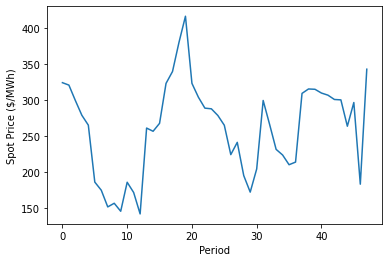

2021-07-10 221.73124999999996


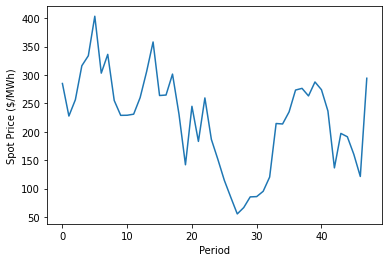

In [11]:
# Iterate through each date and look at whether average spot price for the day is an outlier
# Any average price over $200 were considered a point of interest

delta = timedelta(days=1)
start = first_date
end = last_date

while start < end:
    day = copy.loc[copy["date"] == start]
    
    # Plot day's spot price trend
    if day["Spot Price"].mean() > 200:
        print(start, day["Spot Price"].mean())
        plt.plot(range(len(day["Spot Price"])), day["Spot Price"])
        plt.xlabel("Period")
        plt.ylabel("Spot Price ($/MWh)")
        plt.show()
        
    start += delta

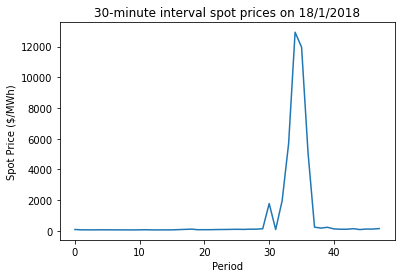

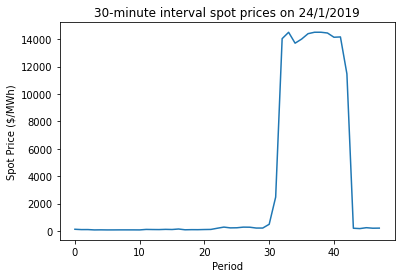

In [13]:
# Choose two dates from the cell above for slides

# Plot for 2018/1/18
plt.plot(range(48), (copy.loc[copy['date'] == datetime.date(2018, 1, 18)])["Spot Price"])
plt.title("30-minute interval spot prices on 18/1/2018")
plt.xlabel("Period")
plt.ylabel("Spot Price ($/MWh)")
plt.savefig("../../plots/18-1-2018.png")
plt.show()

# Plot for 2019/1/24
plt.plot(range(48), (copy.loc[copy['date'] == datetime.date(2019, 1, 24)])["Spot Price"])
plt.title("30-minute interval spot prices on 24/1/2019")
plt.xlabel("Period")
plt.ylabel("Spot Price ($/MWh)")
plt.savefig("../../plots/24-1-2019.png")
plt.show()

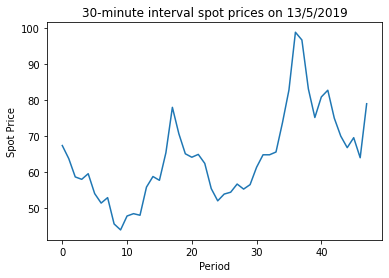

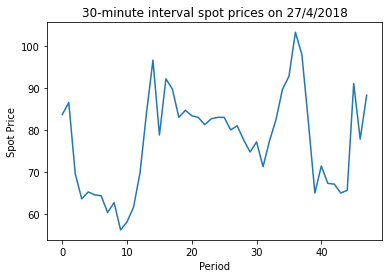

In [12]:
# Choose two "normal" days and plot to compare trends against outlier days

# Plot for 13/5/2019
plt.plot(range(48), (copy.loc[copy['date'] == datetime.date(2018, 5, 13)])["Spot Price"])
plt.title("30-minute interval spot prices on 13/5/2019")
plt.xlabel("Period")
plt.ylabel("Spot Price")
plt.savefig("../../plots/13-5-2019.png")
plt.show()


# Plot for 27/4/2018
plt.plot(range(48), (copy.loc[copy['date'] == datetime.date(2018, 4, 27)])["Spot Price"])
plt.title("30-minute interval spot prices on 27/4/2018")
plt.xlabel("Period")
plt.ylabel("Spot Price")
plt.savefig("../../plots/27-4-2018.png")
plt.show()